# CPSC 601 Connectomics Fall 2024: Exercise 1

Complete the below exercises and hand-in to the Dropbox folder by 23:59pm Friday 27th September. Please submit both a pdf format (with all your code clearly visible) and an ipynb format. 

You will not be graded on code 'quality', optimization, etc. You will be graded on: does it work properly, do you understand what it means.

You may use any code from class and refer to any outside resources (excepting AI tools), as long as you reference them appropriately. 

Interpretation is a fundamental part of analysis - nowhere should you just provide a number or distibution without commenting on what you can learn from it.

You have been given a weighted undirected network representation of the C. elegans nervous system. The nodes are neurons, and the edges correspond to synaptic connections between two neurons. Weights correspond to number of synapses, and the direction of connection is ignored. In this exercise you will explore the three central measures in network science - degree distribution, clustering, and path length - and consider their extensions to weighted networks.

__Matthew McConnell - 30094710. All citations (when necessary) are provided in-line.__

## Q1: Degree, weight, and strength (15 marks)
Plot:
- (a) The degree distibution;
- (b) The edge weight distribution;
- (c) The strength distribution. 

What do you observe? Is this surprising or expected?

In [2]:
!pip install bctpy
!pip install numpy
!pip install networkx
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Imports
import numpy as np
import networkx as nx
import bct
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Default matplotlib things
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [4]:
#https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/
import ast
# Create our graph, load it in
G = nx.Graph()

# Load it in the python way
f = open("celegans_wu", 'r')

for line in f:
    # print(line)
    split = line.strip().split(' ', 2)
    # print(split)
    node1 = int(split[0])
    node2 = int(split[1])
    weight = ast.literal_eval(split[2])
    weight_for_graph = next(iter(weight.values()))
    # print(weight_for_graph)
    
    G.add_edge(node1, node2, weight=weight_for_graph)
    
    # break

# Alternative method
G1 = nx.read_edgelist('./celegans_wu', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

# print(G1[0])

In [5]:
# Sanity checks

# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

279
279
2287
2287
G has 279 nodes and 2287 edges.


In [6]:
# Degree Information

N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)


G_array = nx.to_numpy_array(G)
bct_degrees = bct.degrees_und(G_array)

# for a directed graph, the syntax is:
# in_deg, out_deg, tot_deg = bct.degrees_dir(G_array)

bct_kmin = min(bct_degrees)
bct_kmax = max(bct_degrees)

bct_N = len(G_array)
bct_L = np.sum(G_array)/2 

print("Number of nodes: ", bct_N)
print("Number of edges: ", bct_L)
print()
print("Average degree: ", 2*bct_L/bct_N)
print("Average degree (alternate calculation)", np.mean(bct_degrees))
print()
print("Minimum degree: ", bct_kmin)
print("Maximum degree: ", bct_kmax)

Number of nodes:  279
Number of edges:  7281.0

Average degree:  52.193548387096776
Average degree (alternate calculation) 16.39426523297491

Minimum degree:  2.0
Maximum degree:  93.0


## Degree Distribution Plots ##

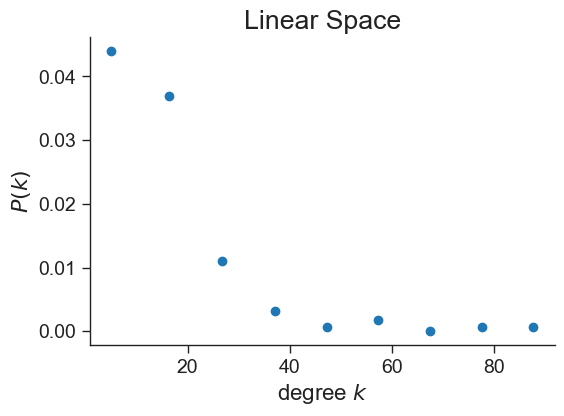

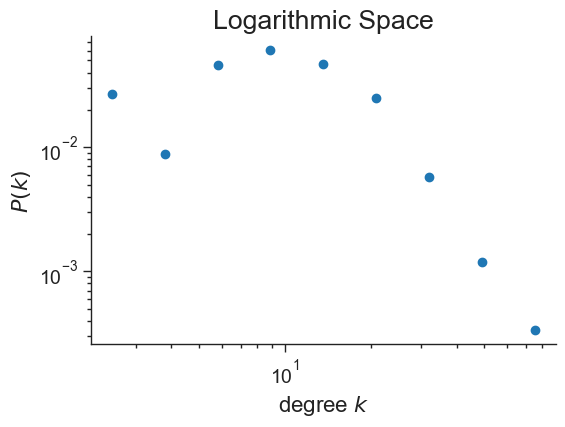

In [7]:

# First, let's do it linearly 
kmin = min(degrees)
kmax = max(degrees)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()

# LOGARITHMICALLY

# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")
# Show the plot
plt.show()



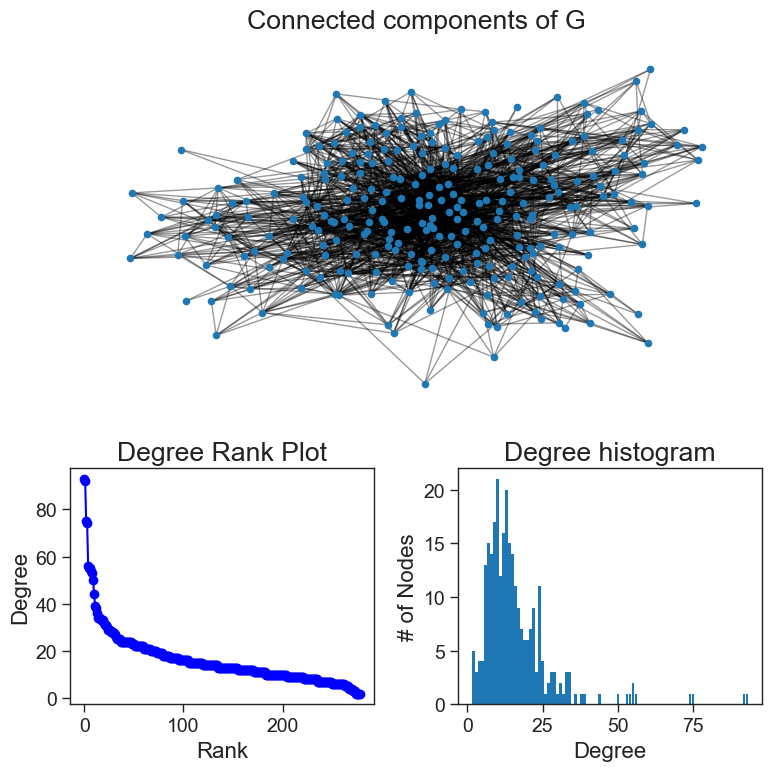

In [8]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html
# Alternative method
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Please note, the above graphic is not inherently important to our discussion of the C. elegans network. I was exploring the documentation regarding networkx, and various ways of plotting, and I wanted to see what examples they had available. I think the best graph from the above three is the connected components section, as it allows us to see a visualization of the graph as a whole. However, they do provide some insight into potential hubs, and how this analysis makes sense for a real-life nervous system. More will follow in terms of analysis, backed up by the particular distribution plots!

## Edge Weight Distribution Plots ##

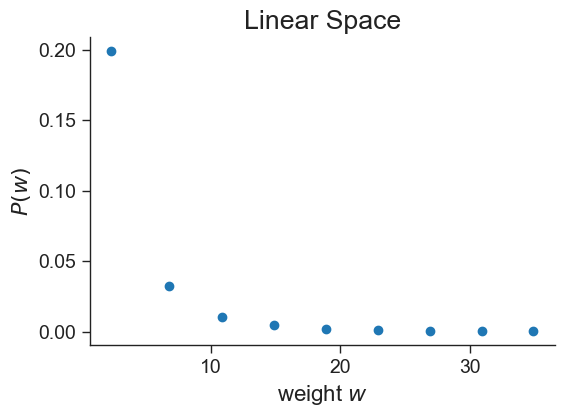

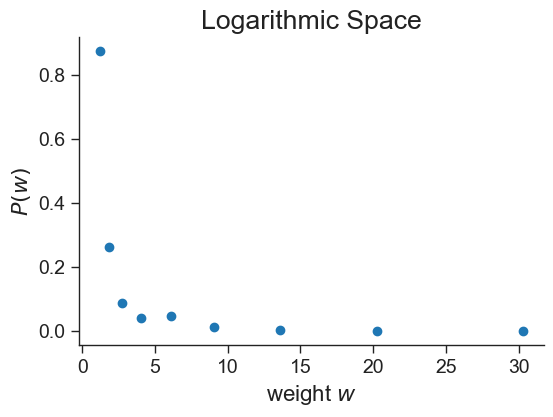

In [9]:
# Probability that a randomly chosen link has weight w
# Let's use a histogram and a regular plot

# First, let's do it linearly 
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
# print(edge_weights)

kmin = min(edge_weights)
kmax = max(edge_weights)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(edge_weights, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $w$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(edge_weights, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $w$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")

# Show the plot
plt.show()



## Strength Distribution Plots ##

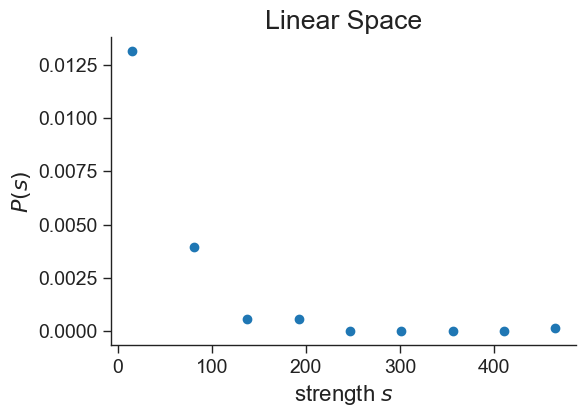

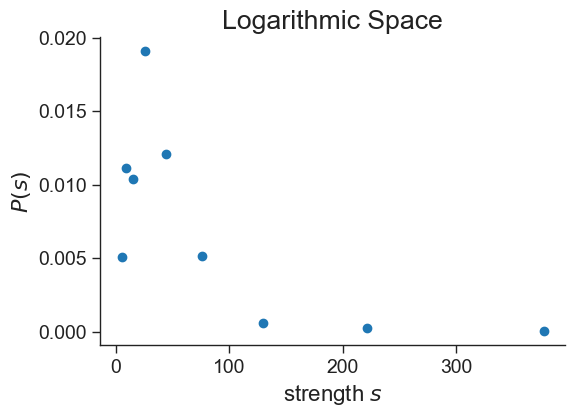

In [10]:
# Probability that a randomly chosen node has strength s
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
strengths = []
for node, strength in dict(G.degree(weight='weight')).items():
    strengths.append(strength)


# print(edge_weights)

kmin = min(strengths)
kmax = max(strengths)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(strengths, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"strength $s$", fontsize=16)
plt.ylabel(r"$P(s)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(strengths, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"strength $s$", fontsize=16)
plt.ylabel(r"$P(s)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")

# Show the plot
plt.show()



__What do we observe? Is this surprising, or expected?__

We know that the C. elegans network provided to us is an undirected, weighted graph, with many nodes and links. We know that the average degree relates to the number of nodes in the graph, as well as the number of links. However, for these initial graphs we are primarily concerned with the distribution of Degree, Weights and Strength across our C. elegans network.

_Degree Distribution_:

We know that the degree distribution of a particular graph is P(k): the probability that a randomly chosen node has degree k. In other words, we can gain some insight into the number of connections that a particular node might have to other nodes, when we consider the distribution across the entire network. We know from class, that a majority of real-world networks are highly "right-skewed", or fat tailed, particular in the case for strength and weight distributions.

As far as the degree distributions for the C. elegans network, I have decided to plot it both in linear as well as exponential space. This gives us a better idea for analysis regarding degree distribution. We could argue that the C. elegans degree distribution follows similar suit to the power law, where we mave many nodes with only a few links, as well as a few hubs with a large number of links. This is intuitive from the graph, as we see a higher probability for lower degrees, and a lower probability for higher degrees. This insight is easily viewable when considering the linear space representation. We can expect many real-life networks to follow similar properties when discussing degree distribution, that we have a large number of nodes with fewer connections, and a small number of nodes with large connections. This leads to the idea that we have a few hubs at the higher end of the degree scale. A limited number of nodes with high degrees might indicate that there are particular regions or areas in the C. elegans network that play a crucial role in maintaining the overall structure, function, information flow, etc... in our network. This makes sense when we consider a real-world nervous system, as we want to be able to facilitate efficient information flow, which might be important when quick reactions are required. I do not claim to be a nervous-system expert, but it seems intuitive that a complex system like this might have central hubs controlling a vast amount of the network, leading to important regions that have complex responsibilities!

_Edge-weight Distribution_:

We know that the edge weight distribution of a particular graph is P(w): the probability that a randomly chosen link has weight w. In general, we know that higher weights often represent some type of higher "cost" from travelling between nodes, whether that be distances or some other value. Higher weights can also represent higher strength of connections or interactions between nodes, depending on the data being considered. Plotting the edge-weight distribution helps us understand how interaction strengths are distributed throughout our network. 

When we consider our edge-weight plots of the C. elegans network, we can see that it also follows in similar suit to a power law, where the majority of nodes have "weak" weights or connections, and a few have relatively strong ones. We can clearly see that the edge-weight distribution is also fat-tailed, which is expected as most real systems we know that P(w) is likely to be fat tailed. This further connects to that idea of hubs, where we have particular regions of interest that will have different edge-weights than the rest. Since we know that these edge-weights represent the number of synapses, it follows suit that our hubs will likely have many connections (as mentioned above), as well as have a large number of synapses surrounding them! A greater weight means a greater number of synapses, so the importance of these hubs, with a greater number and stronger connections, shines through. This also leads us to understand that higher edge-weights are not an inherently bad thing, like they might be if they were the "cost" to travel between nodes, like distance. Typically when we see high-edge weights in a graph, that does not facillitate shortest paths, or quick information traversal. It's important to keep in mind that the high edge-weights are actually extremely beneficial, and the lower-edge weights are "less" important. The edge-weight distribution seems expected for a real-life nervous system network. 

_Strength Distribution_: 

We know that the strength distribution of a particular graph is P(s): the probability that a randomly chosen node has strength s. Furthermore, we know that strength in terms of network science tells us how strongly a particular node is directly connected to other nodes in the network. Or in other words, a weighted degree. Plotting this strength distribution tells us how important or influential particular nodes are, considering both the number of connections as well as the weights of these connections. 

Again, when we are considering our strength distribution plots of the C. elegans network, we can see that it also follows suit to the power law, where the majority of nodes have "low" strength, and a few have relatively strong ones. We can clearly see that the strength-distribution is also fat-tailed, which is expected as most real systems we know that P(s) is likely to be fat tailed. Again, this further connects to the idea of hubs, where we have particular regions of interest that will have different strengths than the rest. It follows suit that we will have these hubs with high strength, as we know that the number of connections as well as the number of synapses will be greater in these hub areas. 

Across all three of our common network analysis distributions, we see relatively expected results for a real-world nervous system. We explore the idea of hubs, where large number of synapses and connections make up important regions of the network. Furthermore, we can start to understand that higher-edge weights and strengths of nodes indicate beneficial properties or regions of the network.


## Q2: Binary metrics (30 marks)

In this question, ignore the weights on the edges and treat the network as if it were binary. 

Calculate (a) the average clustering coefficient; and (b) the average shortest path length for the binarized network representing the C. elegans nervous system. (4 marks)

In [11]:
# First, read in graph again, disregard weights

# Create our graph, load it in
UW_G = nx.Graph()

# Load it in the python way
f = open("celegans_wu", 'r')
for line in f:
    # print(line)
    split = line.strip().split(' ', 2)
    # print(split)
    node1 = int(split[0])
    node2 = int(split[1])
   
    UW_G.add_edge(node1, node2)
    
    
# Might be possible to remove weights from G, instead of reading in, but this seems easier

In [12]:
# A) average clustering coeffecient
print(f"Average Clustering Coefficient: {nx.average_clustering(UW_G)}")

# B) average shortest path length 
print(f"Average Shortest Path Length: {nx.average_shortest_path_length(UW_G)}")



Average Clustering Coefficient: 0.3371339990890197
Average Shortest Path Length: 2.435625692993992


Can we say anything about these numbers? Not really - we need a reference system to compare to. Generate an ensemble of 100 comparable random ER graphs, and calculate both the average clustering and average shortest path length. (4 marks)

In [22]:
# More pythonic way
import itertools as it
import random

# More pythonic way from example exercise notebook
def erdos_renyi(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(edge for edge in it.combinations(nodes, 2) if np.random.uniform() < p)
    return G

graphs = []
print("Nodes: ", UW_G.number_of_nodes())
print("Edges: ", UW_G.number_of_edges())

'''
From textbook:
L = p * (N (N - 1) / 2)
'''

p = 2 * UW_G.number_of_edges() / (UW_G.number_of_nodes() * (UW_G.number_of_nodes() - 1))

print(f"P: {p}")



for i in range(100):
    # graph = erdos_renyi(random.randrange(250, 300), 1e-2)
    # Can use networkx directly
    
    # (nodes, probability for edge creation, seed, directed) 
    graph = nx.erdos_renyi_graph(279, p=p, directed=False) # defaults to false
    
    graphs.append(graph)
    
er_avg_clustering_coefficients = []
er_avg_shortest_path_lengths = []

for g in graphs:
    er_avg_clustering_coefficients.append(nx.average_clustering(g))
    if (nx.is_connected(g)): # can only get a shortest path if the network is connected!!
        er_avg_shortest_path_lengths.append(nx.average_shortest_path_length(g))

# avg_clustering_coefficients
print(er_avg_clustering_coefficients)
print(er_avg_shortest_path_lengths)    

# print avgs of lists
# print(f"Average clustering of 100 random graphs: {sum(avg_clustering_coefficients) / len(avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)}")
print() 
print()
print(f"Average clustering of 100 random graphs: {np.mean(er_avg_clustering_coefficients)}")
print(f"Average shortest path of 100 random graphs: {np.mean(er_avg_shortest_path_lengths)}")


Nodes:  279
Edges:  2287
P: 0.05897217709703205
[0.05663577547297793, 0.056093241395092946, 0.06328762244049665, 0.06145653961851601, 0.05802152872591978, 0.06333814980064977, 0.05702228356292324, 0.06195462529941717, 0.06124222889937562, 0.060075373460150086, 0.0598589268884196, 0.0612543978908463, 0.057969543709372455, 0.057394440459730946, 0.058174794845516624, 0.06054931679285237, 0.05799239129530399, 0.060266940302937486, 0.060517204582190426, 0.05687787430284697, 0.06133221040900237, 0.05623541867535553, 0.06083632935266633, 0.059039123694494836, 0.06200021826213299, 0.059591596717485706, 0.061918622622303535, 0.060431258803107284, 0.061083859468008386, 0.057126373152343736, 0.06040672004914624, 0.05949318452911126, 0.05745448272051128, 0.060429353874163066, 0.05742070695155116, 0.054885669110391944, 0.05794783385794057, 0.05539054154961656, 0.06425231838553941, 0.06089891906982587, 0.060311379625774, 0.060318561129199616, 0.06115546688558778, 0.05794481059021215, 0.0586297040145

Now, generate an ensemble of 100 random graphs through degree-preserving (DP) double edge swaps, and calculate both the average clustering and average shortest path length. (6 marks)

In [23]:
import copy

# Networkx has a `double_edge_swap` method, that swaps two edges in the graph while keeping (preserving) the node degrees
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.swap.double_edge_swap.html

graphs = []

print(UW_G.number_of_edges())
# Generate 100 graphs
for i in range(100):
    graph = copy.deepcopy(UW_G)
    graph = nx.double_edge_swap(graph, nswap=graph.number_of_edges() * 20, max_tries= graph.number_of_edges() * 200)
    # graph = nx.double_edge_swap(graph, nswap=10, max_tries=5000)
    graphs.append(graph)
    

print(nx.average_clustering(UW_G))

# Same collection and analysis as above
dp_avg_clustering_coefficients = []
dp_avg_shortest_path_lengths = []

for g in graphs:
    dp_avg_clustering_coefficients.append(nx.average_clustering(g))
 
    if (nx.is_connected(g)):
        dp_avg_shortest_path_lengths.append(nx.average_shortest_path_length(g))

# avg_clustering_coefficients
print(dp_avg_clustering_coefficients)
print(dp_avg_shortest_path_lengths)    

# print avgs of lists
# print(f"Average clustering of 100 random graphs: {sum(avg_clustering_coefficients) / len(avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)}")
print()
print()
print(f"Average clustering of 100 random graphs: {np.mean(dp_avg_clustering_coefficients)}")
print(f"Average shortest path of 100 random graphs: {np.mean(dp_avg_shortest_path_lengths)}")



2287
0.3371339990890197
[0.14635492196347175, 0.14173619055423714, 0.13986348614949462, 0.13786119563651003, 0.1476307635099307, 0.13187135969696775, 0.14483918876860064, 0.14070762184829874, 0.13156605726731438, 0.13650264122212896, 0.14840391779739118, 0.1453014311498743, 0.1452486031681946, 0.14226521498438174, 0.1325471481675697, 0.1402322869912278, 0.1433167572556909, 0.13933376004467066, 0.14083038226447753, 0.1403183079172735, 0.13375369446901034, 0.13975483477955938, 0.1344384627393531, 0.14613721118099912, 0.1471918418501457, 0.14117608588216807, 0.14393989508585653, 0.1414416893040689, 0.1465447779556352, 0.14025502655154104, 0.13773137184114934, 0.13603672439708286, 0.13762267312217252, 0.14181538637209348, 0.13601570945304123, 0.13692197016021046, 0.13952546306779873, 0.1415187075844294, 0.13869609727804513, 0.1501162970672314, 0.14390823239281775, 0.13444649803548037, 0.13989300494398663, 0.14637954038615558, 0.13632517117295384, 0.1364564051285921, 0.14132317448000906, 0.

Show your results as box plots - one for average clustering, and one for the average path length. Include the ER graphs, the DP graphs, and points for the real values observed in the C. elegans network. (10 marks)

C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\449779356.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\449779356.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])


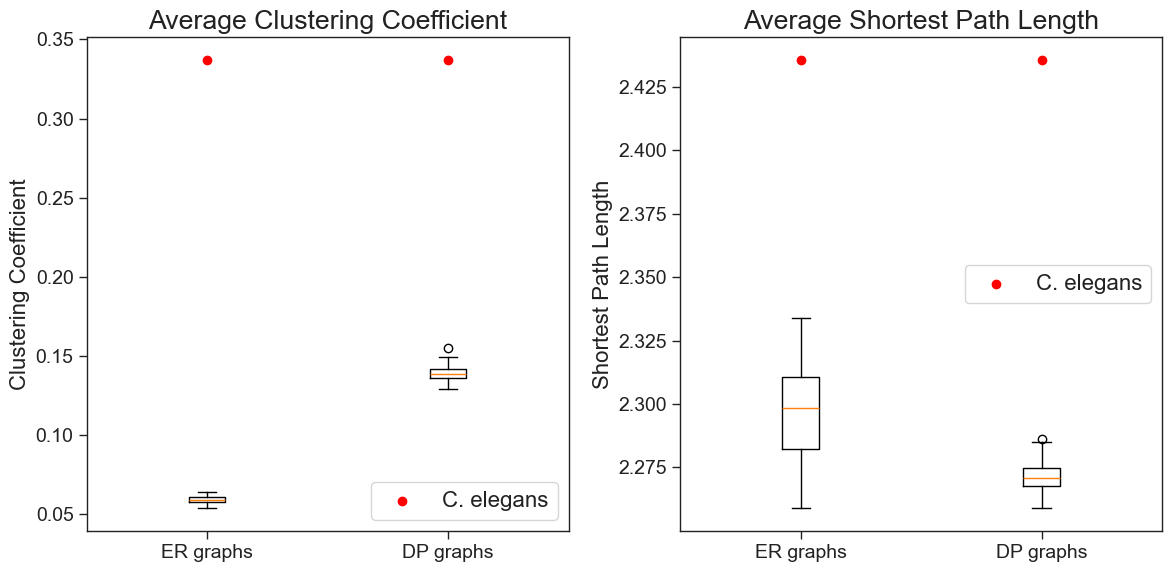

In [15]:
# These don't seem like the best choices for null models for the C. elegans network - which is okay!

# First, average clustering and path length for the REAL values in C. elegans (going to be one data point, let's plot as a scatter)
real_clustering = nx.average_clustering(UW_G)
real_path_length = nx.average_shortest_path_length(UW_G)


clustering_data_combined = [er_avg_clustering_coefficients, dp_avg_clustering_coefficients]
path_data_combined = [er_avg_shortest_path_lengths, dp_avg_shortest_path_lengths]

# Create box plots for average clustering coefficient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for average clustering coefficient
ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
ax[0].scatter(1, real_clustering, color='red', label='C. elegans', zorder=3) # real clustering
ax[0].scatter(2, real_clustering, color='red', zorder=3) # real clustering
ax[0].set_title("Average Clustering Coefficient")
ax[0].set_ylabel("Clustering Coefficient")
ax[0].legend()

# Box plot for average shortest path length
ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])
ax[1].scatter(1, real_path_length, color='red', label='C. elegans', zorder=3) # real path length
ax[1].scatter(2, real_path_length, color='red', zorder=3) # real path length
ax[1].set_title("Average Shortest Path Length")
ax[1].set_ylabel("Shortest Path Length")
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

__Please note, the above graph includes the actual value of the C.elegans network, whereas the below ones will include just the null models in isolation. This will be touched on in the corresponding analysis section...__

C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\975088440.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\975088440.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\975088440.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\975088440.py:21: UserWarning: No artists with labels found to put in legend.

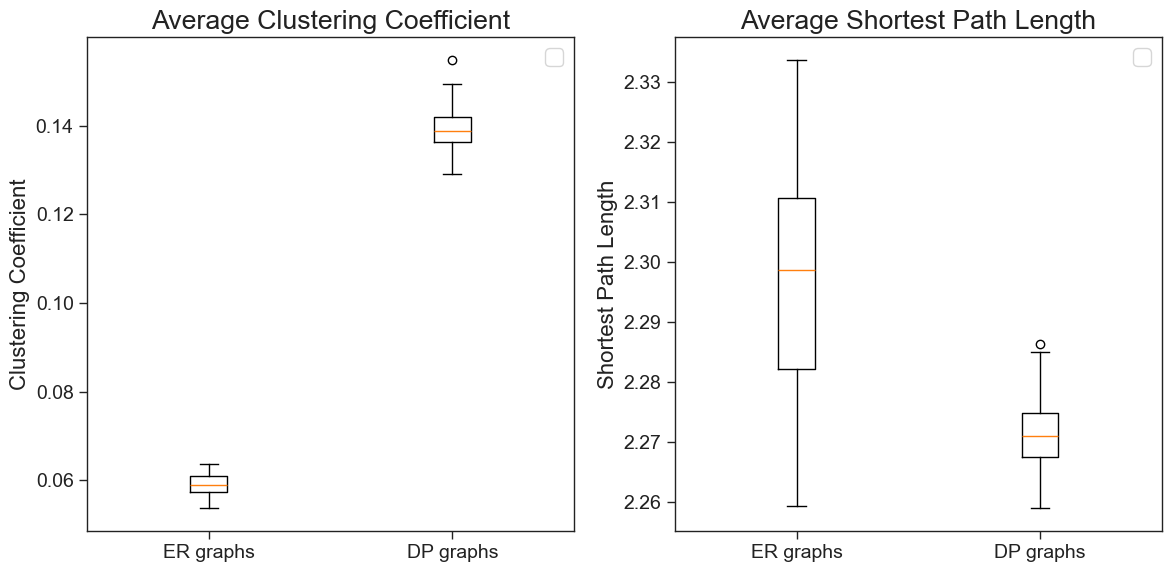

In [16]:
# These don't seem like the best choices for null models for the C. elegans network - which is okay!

clustering_data_combined = [er_avg_clustering_coefficients, dp_avg_clustering_coefficients]
path_data_combined = [er_avg_shortest_path_lengths, dp_avg_shortest_path_lengths]

# Create box plots for average clustering coefficient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for average clustering coefficient
ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
ax[0].set_title("Average Clustering Coefficient")
ax[0].set_ylabel("Clustering Coefficient")
ax[0].legend()

# Box plot for average shortest path length
ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])
ax[1].set_title("Average Shortest Path Length")
ax[1].set_ylabel("Shortest Path Length")
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

What can you say about clustering and path length in C. elegans now? (6 marks)

It's important to recognize that for this analysis, we are NOT considering the weights in the network. 

_Average Clustering Coefficient_:
We know that the average clustering coefficient of a graph is a measure of how nodes tend to cluster together. Or in other words, what fraction of your neighbors are connected. We can think back to the social network example we did in class, that nodes tend to create tightly knit groups, where many people usually know each other. In real world networks, we know that average clustering is pretty high. 

Let's now consider the clustering coeffecients of ER and DP graphs, with relation to the actual C. elegans network! We can see that the average clustering coeffecient for DP and ER graphs are much lower than the actual value found for the C. elegans network. This leads to the conclusion that these randomly generated ER and DP networks might not be the best choice for null models if we want to provide similar networks to our real world C. elegans. However, this leads to another insight - the randomly generated graphs are NOT real world networks. They are instead an attempt to simulate networks for us to compare to. According to the textbook (CITE), we expect random graphs to have decreasing clustering coeffecients as their size increases, whereas real-world graphs seem to be relatively indepenent. We can see that the C. elegans average clustering coeffecient is higher than both of our randomly generated set of samples. The average clustering coeffecient seems to match what intuitively makes more sense for a real-world network, which is expected. We can further posit that the real C. elegans networks has tightly-knit communities, or hubs, corresponding to the large number of neurons at particular nodes, as well as strong connections, which makes sense for a nervous system. The analysis of clustering in the C. elegans network helps us with our intuition that there exists hubs or communities, where large number of synapses and connections live. 

In the ER graph, we are placing the edges randomly, so the chance of high clustering is low. We shouldn't expect to see natural hubs or tight-communities in a graph that is generated simply by randomly placing edges, particularly when we aren't considering weights at all. This helps explain why the ER graphs have the lowest clustering coeffecients compared to the DPs and particularly to the C. elegans network. In the DP graphs, we are preserving the degree distribution of the real networks, but are swapping the edges in a way that can reduce clustering. We have no guarantee that edges that were connected to the original hubs of the C. elegans network are going to be preserved, so this further explains why these do not match well with the real-world network. However, due to the fact that we are preserving the degree distribution, it makes sense that the DP graphs are better related to the C. elegans network, in terms of average clustering. 

Furthermore, I have plotted the ER and DP graphs average clustering coeffecients independent of the actual data point, so we can see that we are getting reasonable data to begin with. We can see that although we are using two different methods, we are still producing null models with "relatively" similar clustering values. As discussed, it makes sense that there exists different clustering in these methods, based on the underlying methods used to create our graphs. Furthermore, we can see that we are generating decent networks, as we have relatively minimal error bars for both ER and DP, indicating that we are generating similar networks in our experiment to generate a random ensemble. 

_Average Path Lengths_:
In real world networks, we know that the path lengths are low. Considering the example from class, it is thought that any individual can make their way through social connections to find any other person in the world, using only 6 hops! Taking a look at our average shortest path lengths for both the ER and DP graphs, we can see that they are in fact, relatively similar to the actual value of the C. elegans network, but they are slightly lower! This makes intuitive sense for a few reasons. First, we are maintaining the number of nodes in our network, so network size is not inherently a factor. Secondly, we are not considering weights in this analysis, so although the real-world C. elegans has different weights for links in our network, if we switch to a binary approach, we can expect a network with the same number of nodes, and similar number of edges to be having a similar average path length. Finally, due to the fact that we are maintaining the degree of nodes in the DP swap, yet still obtaining a similar path length, we can postulate that the hubs in the C. elegans network are playing a major role in transmission of information, acting as central nodes that reduce the distance between external nodes. 


It's important to note, that although randomly generated graphs might not be similar to real-world graphs, they still give us an important baseline to compare real world graphs to, like we have shown here! We are not attempting to determine null models that mimic the C. elegans network, but instead are attempting to generate a baseline to compare real-world to generated.

## Q3: Weighted metrics (45 marks)

Return to your original weighted graph. Both the average clustering coefficient and the average shortest path length generalize to weighted networks - calculate the average weighted clustering coefficient for the C. elegans network. (2 marks)

Hint: Networkx can use the weights if you instruct it to https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html


In [17]:
# G has not been changed, so we should still be able to use that:

avg_weighted_clustering_coeff = nx.average_clustering(G, weight='weight')
avg_weighted_shortest_path = nx.average_shortest_path_length(G, weight='weight')


print(f"Average weighted clustering coeffecient: {avg_weighted_clustering_coeff}, Average weighted shortest path: {avg_weighted_shortest_path}")

Average weighted clustering coeffecient: 0.0288370640155851, Average weighted shortest path: 3.2125525386142697


As you move to consider the weighted average shortest path length, think about what you want the edge weights to mean - a greater weight means a greater number of synapses, and therefore a stronger connection. You will need to choose an appropriate method to invert the edge weights. Implement such an inversion, and then calculate the weighted average shortest path length. (10 marks)

In [18]:
'''
Double check Towlson's email on this, but we can't just do the inverse. We need to do a transformation of an edge weight w_ij might be in the form of C - w_ij, where C is a suitable constant
(we get to figure out what a suitable constant for C is)
'''


# How the f r we supposed to invert the edge weights?
import copy
# Inverting edge weights seems to be as easy as doing w = 1 / w?

# https://stackoverflow.com/questions/64267476/networkx-how-to-reverse-a-directed-edge-in-a-multidigraph
# https://stackoverflow.com/questions/17051589/parsing-through-edges-in-networkx-graph



IW_G = copy.deepcopy(G) # new graph to be inverted

print(f"Weighted average shortest path length BEFORE inversion: {nx.average_shortest_path_length(IW_G, weight='weight')}") # NEEDED TO SPECIFY WEIGHTS!!!
print(f"Weighted ACC BEFORE: {nx.average_clustering(IW_G, weight='weight')}")
# Get the max weight in the real network
max_weight = 0
for u, v, d in IW_G.edges(data=True):
    if d['weight'] > max_weight:
        max_weight = d['weight']

print(max_weight)
for u, v, d in IW_G.edges(data=True):
    
    # d['weight'] = 1 / d['weight']
    d['weight'] = max_weight - d['weight'] + 1 # suitable coeff? 
    

for u, v, d in IW_G.edges(data=True):
    print(d)
# print(IW_G[0]) # verify
# for u, v, d in IW_G.edges(data=True):
#     d['weight'] = 1 / d['weight'] # inversion
    
print(f"Weighted average shortest path length AFTER inversion: {nx.average_shortest_path_length(IW_G, weight='weight')}") # NEEDED TO SPECIFY WEIGHTS!!!
print(f"Weighted ACC AFTER: {nx.average_clustering(IW_G, weight='weight')}")

Weighted average shortest path length BEFORE inversion: 3.2125525386142697
Weighted ACC BEFORE: 0.0288370640155851
37
{'weight': 37}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 37}
{'weight': 36}
{'weight': 36}
{'weight': 36}
{'weight': 34}
{'weight': 31}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 33}
{'weight': 37}
{'weight': 37}
{'weight': 37}
{'weight': 37}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 35}
{'weight': 37}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 37}
{'weight': 37}
{'weight': 35}
{'weight': 37}
{'weight': 36}
{'weight': 33}
{'weight': 36}
{'weight': 37}
{'weight': 35}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 32}
{'weight': 37}
{'weight': 37}
{'weight': 37}
{'weight': 36}
{'weight': 37}
{'weight': 35}
{'weight': 37}
{'weight': 37}
{'weight': 36}
{'weight': 35}
{'weight': 37}
{'weight': 37}
{'weight': 37}
{'weight': 34}
{'weight': 37}
{'weight': 34}
{'weight': 37}
{'weight': 3

What do these numbers mean? Just as with the binary metrics, you now need to compare to a reference system. Again use two null models. For the first, implement a degree preserving double edge swap randomization (don't worry but do note that this does not preserve strength). For the second, fix the edges where they are and randomly shuffle the weights. (15 marks)

In [19]:
# First, let's do another DP swap

import copy

# Networkx has a `double_edge_swap` method, that swaps two edges in the graph while keeping (preserving) the node degrees
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.swap.double_edge_swap.html

double_swap_graphs = []

# Generate 100 graphs
for i in range(100):
    graph = copy.deepcopy(IW_G)
    # graph = nx.double_edge_swap(graph, nswap=graph.number_of_edges() * 10, max_tries= graph.number_of_edges() * 20)
    # graph = nx.double_edge_swap(graph, nswap=10, max_tries=5000)
    graph = nx.double_edge_swap(graph, nswap=graph.number_of_edges() * 20, max_tries= graph.number_of_edges() * 200)
    graphs.append(graph)
    


# Same collection and analysis as above
weighted_average_clustering_coeff_double_swap = []
weighted_average_shortest_path_double_swap = []


for g in graphs:
    weighted_average_clustering_coeff_double_swap.append(nx.average_clustering(g, weight='weight'))
    # NONE OF THE GRAPHS GENERATED ARE CONNECTED??
    if (nx.is_connected(g)):
        weighted_average_shortest_path_double_swap.append(nx.average_shortest_path_length(g, weight='weight'))

# avg_clustering_coefficients
print(weighted_average_clustering_coeff_double_swap)
print(weighted_average_shortest_path_double_swap)    





[0.14396136600302545, 0.14433003131039807, 0.14095412743755714, 0.14012158610719377, 0.13356384605136068, 0.12918540613099128, 0.1367898171083002, 0.14157362251091798, 0.14281502867399562, 0.13850285240287824, 0.14411283581544343, 0.13694480443223087, 0.13848509626533034, 0.13207315387189125, 0.1436133688239009, 0.13705244932516386, 0.13734833779962166, 0.13655758593952202, 0.13466498590487966, 0.1411472558331176, 0.13918896254148913, 0.14133951522162014, 0.1386018521079717, 0.13656449110477628, 0.14555339939567968, 0.1391913675111931, 0.13552095786300278, 0.13206533853691468, 0.14538021874165097, 0.13385544443075179, 0.14007469646575674, 0.13509161259333055, 0.13690053580912498, 0.14051647784196952, 0.1466887621399937, 0.13349964143756643, 0.13216800053978325, 0.13561609039095832, 0.14306424679980445, 0.13105630080400546, 0.1392697762300359, 0.13059353634682416, 0.13963533969799505, 0.14397160379638896, 0.13929807574454778, 0.140477237191475, 0.138307996676746, 0.14197658238085514, 0.

__Selection of weight inversal__
I have decided on the inversion method of C - current_weight, with C being the max weight present in the real network. This allows inversion, as we will have edges with the highest weights switched to closer to zero, and edges with lower weights being closer to the max weight. This seems intuitive, as we theoretically should preserve distance, because we are subtracting from the real max weight present in the network. We know that a greater weight means a greater number of synapses, and therefore a stronger connection. Therefore, our expected behaviour is: nodes connected via edges with smaller weights would have stronger influence than those with larger weights, after our inversion. 


In [20]:
# Second, let's do a random shuffle.

import random


'''
WE NEED TO GENERATE AN ENSEMBLE OF 100 RANDOM GRAPHS FOR EACH NULL MODEL!
'''
# IW_G = copy.deepcopy(G)
print(nx.average_clustering(IW_G))
print(nx.average_clustering(G))
# First, let's implement a degree preserving double edge swap randomization
# DP_RAND_G = nx.double_edge_swap(IW_G, nswap=1, max_tries=100, seed=123)
shuffled_graphs = []
for i in range(100):
    
# SUPER IMPORTANT TO DEEP COPY THIS WAY: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.copy.html
# DP_RAND_G = copy.deepcopy(IW_G) # DP, double edge swap randomization
    FE_SW_G = copy.deepcopy(IW_G) # Fixed Edges, swapped weights
    original_weights = []
    
    for u, v, d in FE_SW_G.edges(data=True):
        original_weights.append(d['weight'])
    
    # Ensure proper shuffling, by shuffling 100 times for each graph (should be random enough?)
    for i in range(100): 
        random.shuffle(original_weights)
    for idx, (u, v) in enumerate(FE_SW_G.edges()):
        FE_SW_G.edges[u, v]['weight'] = original_weights[idx]
        
    shuffled_graphs.append(FE_SW_G)
    

weighted_average_clustering_coeff_shuffled = []
weighted_average_shortest_path_shuffled = []



for graph in shuffled_graphs:
    if nx.is_connected(graph):
        weighted_average_shortest_path_shuffled.append(nx.average_shortest_path_length(graph, weight='weight')) # need to specify weights
    
    weighted_average_clustering_coeff_shuffled.append(nx.average_clustering(graph, weight='weight')) # need to specify weights

print(weighted_average_clustering_coeff_shuffled)
print(weighted_average_shortest_path_shuffled)



0.3371339990890197
0.3371339990890197
[0.3168784020634935, 0.31632378844659775, 0.3158483653877789, 0.31339028669268926, 0.3151806451047575, 0.31665822279477135, 0.31597112696730334, 0.31630173974733666, 0.31566321583573625, 0.31549041095007163, 0.3143663232173144, 0.315683389396094, 0.31653948348956135, 0.313814442132672, 0.31466772703102497, 0.31581741900615257, 0.31649393688778243, 0.31660757088518, 0.315482530195271, 0.314546880834169, 0.3148835536026934, 0.31578697050929705, 0.3140574351802263, 0.31528613547567613, 0.3157565741202932, 0.3163405967663704, 0.3159770566788965, 0.3165505555653376, 0.31360286474127697, 0.31465071399569844, 0.31508537282948496, 0.315814601197401, 0.31616605257740116, 0.31467202562527774, 0.3155194610296915, 0.31464400933596237, 0.3168888150364196, 0.3152274714054505, 0.31460152419748993, 0.31518792709597215, 0.3160286774013241, 0.31494362442674295, 0.31612408787083407, 0.3158475371164228, 0.3153570491688931, 0.3149162273499777, 0.315508725579669, 0.3157

Create similar boxplots as in Q2, one for the weighted average clustering coefficient and one for the weighted average shortest path. (10 marks)

C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\3419504929.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([weighted_average_clustering_coeff_shuffled, weighted_average_clustering_coeff_double_swap], labels=["Shuffle graphs", "Swap graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_26364\3419504929.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([weighted_average_shortest_path_shuffled, weighted_average_shortest_path_double_swap], labels=["Shuffle graphs", "Swap graphs"])


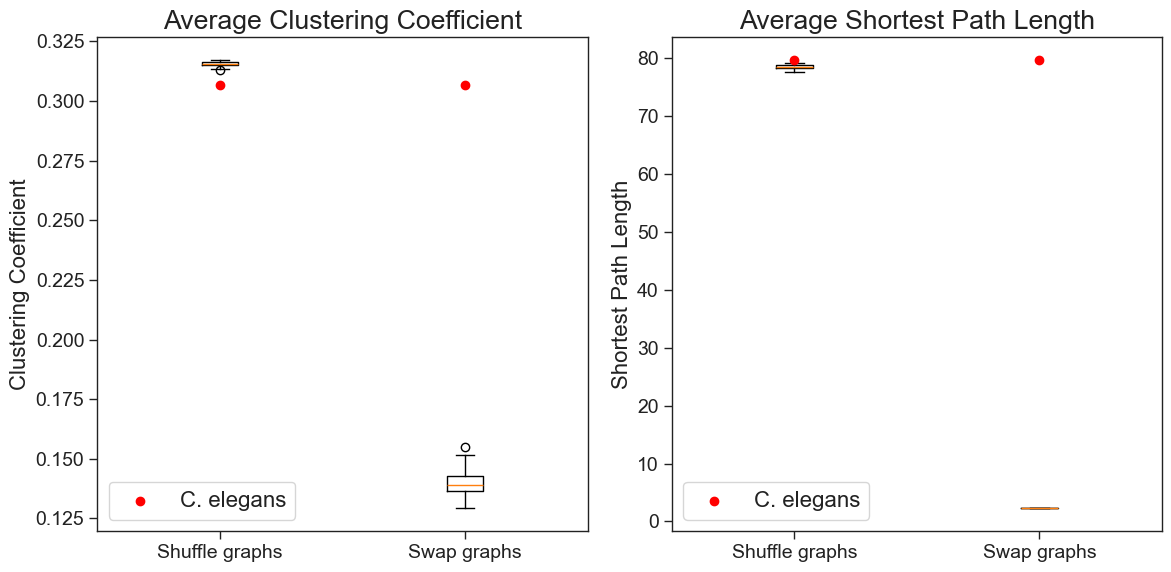

In [21]:
# First, average clustering and path length for the REAL values in C. elegans (going to be one data point, let's plot as a scatter)
real_clustering = nx.average_clustering(IW_G, weight='weight')
real_path_length = nx.average_shortest_path_length(IW_G, weight='weight')


# Create box plots for average clustering coefficient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for average clustering coefficient
ax[0].boxplot([weighted_average_clustering_coeff_shuffled, weighted_average_clustering_coeff_double_swap], labels=["Shuffle graphs", "Swap graphs"])
ax[0].scatter(1, real_clustering, color='red', label='C. elegans', zorder=3)
ax[0].scatter(2, real_clustering, color='red', zorder=3)
ax[0].set_title("Average Clustering Coefficient")
ax[0].set_ylabel("Clustering Coefficient")
ax[0].legend()
# ax[0].set_ylim(0.475, 0.525)
# Box plot for average shortest path length
ax[1].boxplot([weighted_average_shortest_path_shuffled, weighted_average_shortest_path_double_swap], labels=["Shuffle graphs", "Swap graphs"])
ax[1].scatter(1, real_path_length, color='red', label='C. elegans', zorder=3)
ax[1].scatter(2, real_path_length, color='red', zorder=3)
ax[1].set_title("Average Shortest Path Length")
ax[1].set_ylabel("Shortest Path Length")
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

Interpret your findings - what can you say about weighted clustering and weighted average shortest path in C. elegans? (8 marks)

__Weighted Clustering in C. elegans__:

We can see that the average clustering coeffecient when considering weights for the C. elegans network is quite similar to the non-inverted network. 

__Weighted average shortest path in C. elegans__:

Since we are inverting the weights, we are effectively removing the functionality / benefit of the hubs we have discussed in the C. elegans network. If we have central nodes or regions that information efficiently travels through, and then invert the weights for these, we are effectively turning these hubs into external nodes, and external nodes into hubs. However, we are maintaining the edges, so if we attempt to find the average shortest path length through our inverted network, we will be traversing an incredibly unoptimal path, in the event our network was making use of hubs. 

When we shuffle the weights, we are no longer preserving the weighted degree! However, we know that the DP swap will preserve degree, so the ASP is much smaller.

It is intuitive - and clear, that when we invert the weights in C. elegans, our shortest path increases magnificantly. This is a result of the destruction of hubs that we have posited exist in the network. Since inverting the weights affect our average shortest path length (weighted) in the C. elegans network, it is clear to say that the actual C. elegans network (non-inverted) takes use of hubs or tight-knit communities, where many synapses work together to transfer information effectively. 